# Unit 5 - Financial Planning


In [2]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [3]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [4]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [5]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [6]:
# Fetch current BTC price
btc = requests.get(btc_url)
btc_current_price = btc.json()
btc_price = btc_current_price['data']['1']['quotes']['USD']['price']
btc_value = btc_price * my_btc
btc_value

# Fetch current ETH price
eth = requests.get(eth_url)
eth_current_price = eth.json()
eth_price = eth_current_price['data']['1027']['quotes']['USD']['price']
eth_value = eth_price * my_eth
eth_value

# Compute current value of my crpto
crypto_total = btc_value + eth_value
crypto_total

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${eth_value:0.2f}")
print(f"The current value of your total Crypto assets is ${crypto_total:0.2f}")

The current value of your 1.2 BTC is $52213.20
The current value of your 5.3 ETH is $18253.73
The current value of your total Crypto assets is $70466.93


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [7]:
# Current amount of shares
# YOUR CODE HERE!
my_agg = 200
my_spy = 50

In [8]:
# Set Alpaca API key and secret
alpaca_api = os.getenv('ALPACA_API_KEY')
alpaca_secret = os.getenv('ALPACA_SECRET_KEY')

# Create the Alpaca API object
api = tradeapi.REST(alpaca_api, alpaca_secret, api_version = 'v2')

In [10]:
# Format current date as ISO format
# YOUR CODE HERE!
today = pd.Timestamp("2021-05-18", tz="America/New_York").isoformat()
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_closing = api.get_barset(tickers, timeframe, start=today, end=today).df

# Preview DataFrame
df_closing.head()


AGG                                     SPY  \
                             open    high     low   close   volume   open   
time                                                                        
2021-05-18 00:00:00-04:00  114.11  114.11  114.03  114.07  3499293  415.8   

                                                             
                             high     low   close    volume  
time                                                         
2021-05-18 00:00:00-04:00  416.06  411.77  411.99  52318555

In [11]:
# Pick AGG and SPY close prices
agg_close_price = float(df_closing['AGG']['close'])
spy_close_price = float(df_closing['SPY']['close'])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $114.07
Current SPY closing price: $411.99


In [13]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price
shares_total = my_spy_value + my_agg_value
# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $20599.50
The current value of your 200 AGG shares is $22814.00


### Savings Health Analysis

In [14]:
# Set monthly household income
monthly_income = 12000

# Create savings DataFrame
df_savings = pd.DataFrame()
df_savings["Amount"] = [crypto_total,shares_total]
df_savings.index = (["crypto","shares"])

# Display savings DataFrame
display(df_savings)

,Amount
crypto,70466.93
shares,43413.50


<AxesSubplot:title={'center':'Savings'}, ylabel='Amount'>

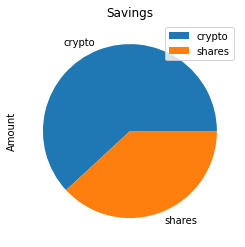

In [18]:
# Plot savings pie chart
df_savings.plot.pie(y="Amount", title = 'Savings')

In [22]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = crypto_total + shares_total

# Validate saving health
if total_savings >= emergency_fund:
    print('Congratulations, your savings amount is in good health!')
else:
    print(f"You have ${emergency_fund - total_savings} to get to your emergency fund")

Congratulations, your savings amount is in good health!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [24]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-08-07', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat()

In [38]:
# Get 5 years' worth of historical data for SPY and AGG
tickers = ['AGG', 'SPY']
df_stock_data = api.get_barset(tickers, timeframe, start=start_date, end=end_date,limit=1000).df
# Display sample data
df_stock_data.head()

AGG                                          \
                             open      high       low    close     volume   
time                                                                        
2016-08-17 00:00:00-04:00  112.45  112.6600  112.3600  112.580  3136737.0   
2016-08-18 00:00:00-04:00  112.64  112.7799  112.5350  112.705  1814107.0   
2016-08-19 00:00:00-04:00  112.53  112.6200  112.3900  112.490  2961016.0   
2016-08-22 00:00:00-04:00  112.66  112.7380  112.5600  112.650  1647564.0   
2016-08-23 00:00:00-04:00  112.78  112.8250  112.6301  112.690  2197732.0   

                              SPY                                      
                             open    high     low   close      volume  
time                                                                   
2016-08-17 00:00:00-04:00     NaN     NaN     NaN     NaN         NaN  
2016-08-18 00:00:00-04:00  218.33  218.90  218.21  218.87  42850145.0  
2016-08-19 00:00:00-04:00  218.31  218.75  217.74  218.57  52238224.0  
2016-08-22 00:00:00-04:00  218.27  218.80  217.83  218.50  48628907.0  
2016-08-23 00:00:00-04:00  219.25  219.60  218.90  218.94  41981207.0

In [39]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30year = MCSimulation(
    portfolio_data = df_stock_data,
    num_simulation = 500,
    weights = [.60,.40],
    num_trading_days =252*30)

In [40]:
# Printing the simulation input data
MC_30year.portfolio_data.head()

AGG                                          \
                             open      high       low    close     volume   
time                                                                        
2016-08-17 00:00:00-04:00  112.45  112.6600  112.3600  112.580  3136737.0   
2016-08-18 00:00:00-04:00  112.64  112.7799  112.5350  112.705  1814107.0   
2016-08-19 00:00:00-04:00  112.53  112.6200  112.3900  112.490  2961016.0   
2016-08-22 00:00:00-04:00  112.66  112.7380  112.5600  112.650  1647564.0   
2016-08-23 00:00:00-04:00  112.78  112.8250  112.6301  112.690  2197732.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2016-08-17 00:00:00-04:00          NaN     NaN     NaN     NaN     NaN   
2016-08-18 00:00:00-04:00     0.001110  218.33  218.90  218.21  218.87   
2016-08-19 00:00:00-04:00    -0.001908  218.31  218.75  217.74  218.57   
2016-08-22 00:00:00-04:00     0.001422  218.27  218.80  217.83  218.50   
2016-08-23 00:00:00-04:00     0.000355  219.25  219.60  218.90  218.94   

                                                    
                               volume daily_return  
time                                                
2016-08-17 00:00:00-04:00         NaN          NaN  
2016-08-18 00:00:00-04:00  42850145.0          NaN  
2016-08-19 00:00:00-04:00  52238224.0    -0.001371  
2016-08-22 00:00:00-04:00  48628907.0    -0.000320  
2016-08-23 00:00:00-04:00  41981207.0     0.002014

In [41]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.006010,0.998216,1.004509,0.987629,1.005762,0.994967,1.001386,0.997412,0.995342,1.002536,...,0.994557,0.996715,1.011074,0.998088,1.000296,0.990221,0.998476,0.996186,0.992822,1.002156
2,0.992562,1.000527,1.010865,0.995734,1.013567,1.003177,1.013351,0.998126,0.989824,1.004324,...,1.007896,1.000413,1.014727,0.998048,1.002590,0.997586,0.994186,1.005133,0.992336,0.997374
3,0.995371,1.009150,1.015796,0.991222,1.009795,1.010094,1.017000,0.993962,0.984776,0.999250,...,1.012322,1.000368,1.015006,0.991678,0.990228,0.995929,0.988757,1.003563,0.996098,1.001998
4,0.985966,1.007241,1.021947,0.991491,1.003191,1.012850,1.006747,0.995372,0.978389,0.989439,...,1.012724,1.010535,1.016161,0.986001,0.980226,0.993402,0.982932,1.000662,0.997599,1.003911
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,5.034727,3.783066,4.578804,2.333288,4.771636,2.614982,11.432141,6.653441,4.249534,2.036599,...,7.720102,3.700688,4.771013,3.720588,7.182752,6.446412,11.269912,3.098202,7.067813,6.862890
7557,4.999548,3.775969,4.540372,2.315600,4.764599,2.587687,11.423052,6.623061,4.249480,2.044779,...,7.731320,3.688324,4.824596,3.707621,7.219490,6.494121,11.178080,3.109183,7.067308,6.874226
7558,4.999113,3.748731,4.519888,2.315101,4.723424,2.597894,11.480288,6.636723,4.258336,2.047088,...,7.747390,3.706493,4.794730,3.713747,7.175563,6.462386,11.091328,3.120487,7.040581,6.881707
7559,4.976390,3.743524,4.537530,2.310520,4.756984,2.581605,11.385068,6.660019,4.220308,2.042172,...,7.740843,3.714413,4.773717,3.747902,7.189009,6.479801,11.022862,3.128432,6.982195,6.869991


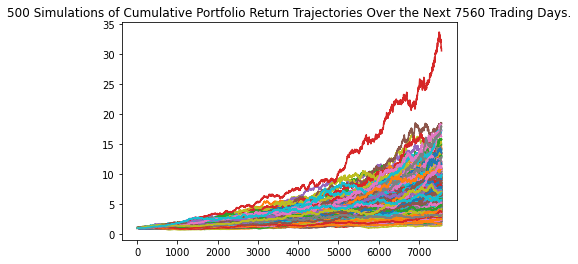

In [42]:
# Plot simulation outcomes
line_plot = MC_30year.plot_simulation()

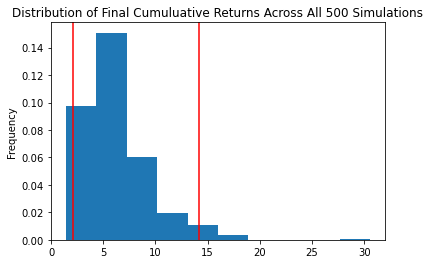

In [43]:
# Plot probability distribution and confidence intervals
dist_plot = MC_30year.plot_distribution()

### Retirement Analysis

In [45]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_30year.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              6.302960
std               3.169984
min               1.408987
25%               4.139758
50%               5.627631
75%               7.589052
max              30.570243
95% CI Lower      2.135292
95% CI Upper     14.151995
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [46]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*20000,2)
ci_upper = round(tbl[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $42705.84 and $283039.9


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [23]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $68909.24 and $804316.75


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [24]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [25]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002773,0.995921,0.995673,0.994602,1.005021,0.998532,1.001126,1.005124,0.994500,0.999171,...,1.002697,1.007377,0.999067,0.997822,0.998338,1.003092,0.997770,1.005395,0.999348,1.005300
2,1.004519,0.994920,0.995504,0.997885,0.999418,1.002665,0.998714,1.009062,0.992389,0.997706,...,1.004034,1.008911,0.999323,1.000654,0.999466,1.004265,0.994733,1.003748,0.996511,1.012382
3,1.003420,0.989709,0.994363,1.001670,1.004349,1.002377,1.001845,1.011481,0.991912,0.994580,...,1.002351,1.006664,1.002174,0.998934,1.003854,1.010202,0.996131,1.002018,0.999665,1.014892
4,0.999165,0.990064,0.986792,1.003455,1.007765,1.007514,0.997581,1.015886,0.986637,0.998216,...,1.002834,0.999865,1.000353,1.003079,1.003303,1.012221,0.997754,1.000544,1.001517,1.013704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.266580,1.196174,1.233861,1.609848,1.173492,1.242440,1.329611,1.157732,1.354542,0.980124,...,1.193369,1.265576,1.176646,1.146853,1.214548,1.145207,1.193672,1.131104,1.003777,1.234636
1257,1.259830,1.201814,1.231141,1.621046,1.172662,1.239173,1.331916,1.157722,1.354061,0.980815,...,1.194320,1.269009,1.182694,1.146907,1.213701,1.143455,1.200143,1.131160,1.006530,1.234546
1258,1.265916,1.196261,1.226184,1.622075,1.174943,1.240829,1.335755,1.157986,1.350916,0.981539,...,1.203336,1.271746,1.178878,1.148263,1.213656,1.146064,1.197322,1.134041,1.005902,1.236184
1259,1.268268,1.202293,1.223321,1.623647,1.170809,1.248084,1.336792,1.162289,1.341674,0.977214,...,1.200892,1.273981,1.175435,1.145972,1.210717,1.146312,1.194024,1.132655,1.007751,1.242664


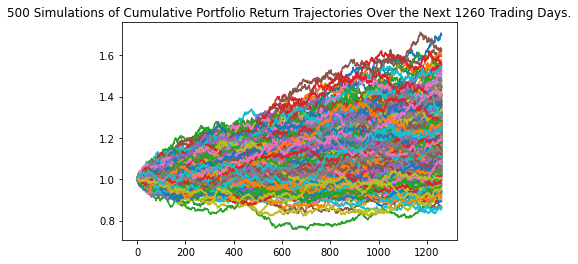

In [26]:
# Plot simulation outcomes
# YOUR CODE HERE!

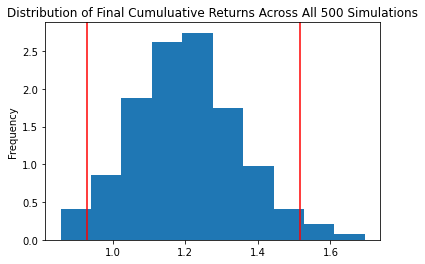

In [27]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [28]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

count           500.000000
mean              1.202273
std               0.145565
min               0.856322
25%               1.100622
50%               1.197687
75%               1.292270
max               1.695081
95% CI Lower      0.928556
95% CI Upper      1.517173
Name: 1260, dtype: float64


In [29]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 30 years will end within in the range of $55713.36 and $91030.38


### Ten Years Retirement Option

In [30]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [31]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.997817,0.998428,1.000816,1.000202,1.002120,0.998788,1.004226,1.004250,1.001431,1.000740,...,0.995519,1.001253,1.000492,0.994026,1.006129,1.002356,1.005233,0.999769,1.002106,1.003746
2,0.994703,0.996223,1.001987,0.998816,1.002372,0.996708,1.009074,1.006986,1.006219,0.995591,...,0.991815,1.001091,1.003774,0.989341,1.007530,1.009809,1.007273,0.999666,1.006340,0.998303
3,0.994115,0.993375,0.992622,1.001069,0.999700,1.000123,1.011610,1.009254,1.012194,0.998619,...,0.992699,1.003085,1.005997,0.991536,1.004239,1.010765,1.009501,0.999652,1.011737,0.998762
4,0.999040,0.997821,0.992272,0.999767,1.000459,1.006178,1.008906,1.009897,1.014282,0.995619,...,0.997683,1.007825,1.007858,0.991188,1.009171,1.009303,1.008223,1.003270,1.014350,1.001691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.164254,1.246948,1.441080,1.685210,1.702114,1.474774,1.535126,1.288182,1.138653,1.500977,...,1.367442,1.357662,1.661583,1.348599,1.649220,1.782632,1.450872,1.701338,1.199957,1.171159
2517,2.169555,1.246315,1.436260,1.685058,1.697652,1.479128,1.536203,1.288485,1.144082,1.498097,...,1.366833,1.360457,1.672969,1.351751,1.646287,1.781356,1.459438,1.695322,1.197466,1.171882
2518,2.169089,1.243387,1.426446,1.685480,1.714264,1.479079,1.537777,1.289258,1.140795,1.496271,...,1.368088,1.357853,1.662915,1.354957,1.637911,1.781046,1.451367,1.695901,1.201111,1.172847
2519,2.170695,1.238881,1.419187,1.670521,1.720418,1.478161,1.544292,1.296500,1.137510,1.499085,...,1.370125,1.359697,1.664317,1.352170,1.633762,1.778638,1.443413,1.699061,1.191529,1.166331


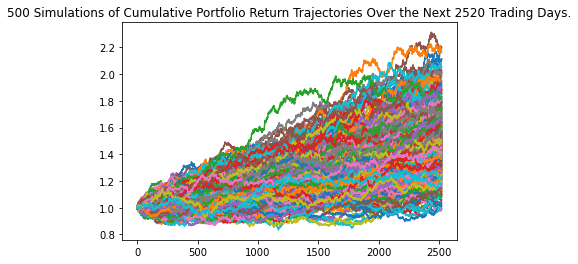

In [32]:
# Plot simulation outcomes
# YOUR CODE HERE!

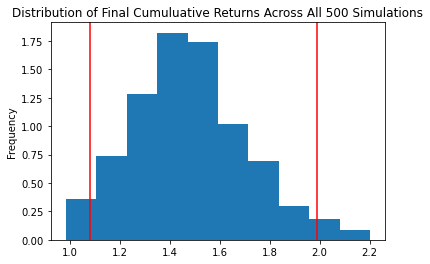

In [33]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [34]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

count           500.000000
mean              1.477364
std               0.230147
min               0.984413
25%               1.319127
50%               1.468676
75%               1.613270
max               2.202006
95% CI Lower      1.083048
95% CI Upper      1.990417
Name: 2520, dtype: float64


In [35]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 30 years will end within in the range of $64982.9 and $119425.0
